In [1]:
#Install library:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install scikit-learn
!pip install matplotlib

In [2]:
# Import library:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Membaca dataset account
url = 'https://github.com/csry15/Fraud_data/blob/main/account_data.csv/?raw=True'
account_data = pd.read_csv(url)

account_data

,Age,Occupation,MaritalStatus,Dependents,ResidentialStatus,AddressDuration,CreditScore,IncomeLevel,LoanAmountRequested,LoanTerm,...,AccountActivity,PaymentBehavior,Blacklists,EmploymentVerification,PastFinancialMalpractices,DeviceInformation,SocialMediaFootprint,ConsistencyinData,Referral,IsFraud
0,56,Teacher,Divorced,4,Own,1,827,52033,300000,25,...,Normal,On-time,No,Verified,No,Tablet,Yes,Consistent,Referral,No
1,40,Engineer,Single,0,Rent,1,830,42893,8105,3,...,Normal,On-time,No,Verified,No,Laptop,No,Consistent,Online,No
2,25,Clerk,Married,0,Live with Parents,360,809,141233,75734,19,...,Normal,On-time,Yes,Verified,No,Laptop,No,Consistent,Referral,No
3,34,Unemployed,Single,0,Rent,92,630,9217,2000,1,...,Unusual,Defaulted,No,Not Verified,Yes,Mobile,No,Inconsistent,Online,Yes
4,47,Software Developer,Single,0,Rent,26,733,47979,67767,1,...,Normal,On-time,No,Verified,No,Laptop,No,Consistent,Online,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,53,Doctor,Divorced,0,Own,134,749,109835,2000,24,...,Normal,On-time,No,Verified,No,Desktop,No,Consistent,Referral,No
9996,56,Self-employed,Single,1,Own,1,749,65018,66029,5,...,Normal,Late,No,Verified,No,Desktop,No,Consistent,Referral,No
9997,22,Student,Single,0,Rent,85,811,0,2000,1,...,Normal,Defaulted,Yes,Not Verified,No,Mobile,No,Inconsistent,Online,Yes
9998,40,Self-employed,Single,0,Rent,1,757,6907,7352,12,...,Normal,Defaulted,No,Not Verified,No,Mobile,Yes,Inconsistent,Online,Yes


In [4]:
# Menghitung missing values pada dataset account
account_data.isnull().sum()

Age                          0
Occupation                   0
MaritalStatus                0
Dependents                   0
ResidentialStatus            0
AddressDuration              0
CreditScore                  0
IncomeLevel                  0
LoanAmountRequested          0
LoanTerm                     0
PurposeoftheLoan             0
Collateral                   0
InterestRate                 0
PreviousLoans                0
ExistingLiabilities          0
ApplicationBehavior          0
LocationofApplication        0
ChangeinBehavior             0
TimeofTransaction            0
AccountActivity              0
PaymentBehavior              0
Blacklists                   0
EmploymentVerification       0
PastFinancialMalpractices    0
DeviceInformation            0
SocialMediaFootprint         0
ConsistencyinData            0
Referral                     0
IsFraud                      0
dtype: int64

In [5]:
# Periksa tipe data feature account
account_data.dtypes

Age                            int64
Occupation                    object
MaritalStatus                 object
Dependents                     int64
ResidentialStatus             object
AddressDuration                int64
CreditScore                    int64
IncomeLevel                    int64
LoanAmountRequested            int64
LoanTerm                       int64
PurposeoftheLoan              object
Collateral                    object
InterestRate                 float64
PreviousLoans                  int64
ExistingLiabilities            int64
ApplicationBehavior           object
LocationofApplication         object
ChangeinBehavior              object
TimeofTransaction             object
AccountActivity               object
PaymentBehavior               object
Blacklists                    object
EmploymentVerification        object
PastFinancialMalpractices     object
DeviceInformation             object
SocialMediaFootprint          object
ConsistencyinData             object
R

In [6]:
account_data['IsFraud'] = account_data['IsFraud'].replace({'Yes': 1, 'No': 0})

In [7]:
account_data['IsFraud'].value_counts()

0    7774
1    2226
Name: IsFraud, dtype: int64

In [8]:
# Describe Data
account_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,34.83790,12.631048,22.0,22.0,31.0,45.00,56.0
Dependents,10000.0,1.32340,1.506399,0.0,0.0,1.0,2.00,4.0
AddressDuration,10000.0,69.08740,84.854114,1.0,1.0,50.0,86.00,360.0
CreditScore,10000.0,768.70130,74.280933,580.0,721.0,801.0,830.00,830.0
IncomeLevel,10000.0,45994.61560,44648.184654,0.0,8277.5,32791.0,71698.00,150000.0
LoanAmountRequested,10000.0,57218.91560,72897.716564,2000.0,10555.0,44008.5,68073.75,300000.0
LoanTerm,10000.0,13.84770,10.923508,1.0,2.0,13.0,24.00,30.0
InterestRate,10000.0,5.14997,0.973665,4.5,4.5,4.5,5.60,8.0
PreviousLoans,10000.0,1.65690,1.172996,0.0,1.0,1.0,2.00,4.0
ExistingLiabilities,10000.0,3046.74250,2091.148502,0.0,1222.0,3231.0,4545.25,7000.0


In [9]:
account_data[
    'MaritalStatus'
].value_counts()

Single      5551
Divorced    2457
Married     1992
Name: MaritalStatus, dtype: int64

In [10]:
account_data[
    'Occupation'
].value_counts()

Manager               1638
Engineer              1546
Technician             597
Artist                 595
Doctor                 591
Accountant             558
Designer               488
Self-employed          473
Entrepreneur           427
Teacher                421
Musician               419
Chef                   338
Unemployed             318
Architect              298
Software Developer     279
Clerk                  263
Retired                261
Student                259
Lawyer                 231
Name: Occupation, dtype: int64

In [11]:
data_temp = pd.get_dummies(account_data[['Occupation', 'MaritalStatus','ResidentialStatus', 'PurposeoftheLoan', 'Collateral', 'ApplicationBehavior',
                                         'LocationofApplication', 'ChangeinBehavior', 'AccountActivity', 'PaymentBehavior', 'Blacklists',
                                         'EmploymentVerification', 'PastFinancialMalpractices', 'DeviceInformation', 'SocialMediaFootprint',
                                         'ConsistencyinData', 'Referral']])
account_df = pd.concat([account_data, data_temp], axis=1)
account_df.drop(columns=['Occupation', 'MaritalStatus', 'ResidentialStatus', 'PurposeoftheLoan',  'Collateral', 'ApplicationBehavior', 'LocationofApplication',
                         'ChangeinBehavior', 'AccountActivity', 'PaymentBehavior', 'Blacklists', 'EmploymentVerification', 'PastFinancialMalpractices',
                         'DeviceInformation', 'SocialMediaFootprint', 'ConsistencyinData', 'Referral'], inplace=True)

In [12]:
pd.set_option('display.max_columns', None)
account_df.sample(10)

,Age,Dependents,AddressDuration,CreditScore,IncomeLevel,LoanAmountRequested,LoanTerm,InterestRate,PreviousLoans,ExistingLiabilities,TimeofTransaction,IsFraud,Occupation_Accountant,Occupation_Architect,Occupation_Artist,Occupation_Chef,Occupation_Clerk,Occupation_Designer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Lawyer,Occupation_Manager,Occupation_Musician,Occupation_Retired,Occupation_Self-employed,Occupation_Software Developer,Occupation_Student,Occupation_Teacher,Occupation_Technician,Occupation_Unemployed,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,ResidentialStatus_Live with Parents,ResidentialStatus_Own,ResidentialStatus_Rent,PurposeoftheLoan_auto,PurposeoftheLoan_education,PurposeoftheLoan_home,PurposeoftheLoan_medical,PurposeoftheLoan_personal,PurposeoftheLoan_travel,Collateral_No,Collateral_Yes,ApplicationBehavior_Normal,ApplicationBehavior_Rapid,LocationofApplication_Local,LocationofApplication_Unusual,ChangeinBehavior_No,ChangeinBehavior_Yes,AccountActivity_Normal,AccountActivity_Unusual,PaymentBehavior_Defaulted,PaymentBehavior_Late,PaymentBehavior_On-time,Blacklists_No,Blacklists_Yes,EmploymentVerification_Not Verified,EmploymentVerification_Verified,PastFinancialMalpractices_No,PastFinancialMalpractices_Yes,DeviceInformation_Desktop,DeviceInformation_Laptop,DeviceInformation_Mobile,DeviceInformation_Tablet,SocialMediaFootprint_No,SocialMediaFootprint_Yes,ConsistencyinData_Consistent,ConsistencyinData_Inconsistent,Referral_Online,Referral_Referral
6229,22,0,1,637,90015,2000,23,4.5,2,4106,09:30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0
352,40,1,1,710,814,2000,1,6.8,1,4355,12:00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0
7914,35,0,1,580,30022,63380,30,4.5,1,4311,01:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0,1,0
2135,22,1,73,739,12748,2000,1,4.5,1,4104,15:40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,1,1,0
5200,27,4,71,830,0,56882,2,4.5,1,3206,12:00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0
5130,22,3,1,701,64454,23836,30,4.5,2,0,02:00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,1,0,1,0
9943,56,0,16,830,150000,63687,30,4.7,3,7000,16:30,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,1
38,34,0,360,830,90908,79504,15,4.5,1,0,10:00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,0,0,1
5946,23,1,1,830,21030,2276,30,5.1,1,0,16:30,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1
95,22,1,1,830,85502,47085,8,4.5,2,1446,12:45,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,1,0,0,1


In [13]:
account_df = account_df.loc[:, ~account_df.columns.str.contains('^TimeofTransaction')]

In [14]:
account_df_feature = account_df.drop('IsFraud',1)
sr_IsFraud= account_df['IsFraud']

<ipython-input-14-51d90f1df0a0>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  account_df_feature = account_df.drop('IsFraud',1)


In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_selector = SelectKBest(chi2, k = 10)
chi2_selector.fit(account_df_feature, sr_IsFraud)

cols = chi2_selector.get_support(indices=True)
account_df_feature = account_df_feature.iloc[:,cols]

account_df_feature

,Age,AddressDuration,CreditScore,IncomeLevel,LoanAmountRequested,LoanTerm,LocationofApplication_Unusual,EmploymentVerification_Not Verified,DeviceInformation_Mobile,ConsistencyinData_Inconsistent
0,56,1,827,52033,300000,25,0,0,0,0
1,40,1,830,42893,8105,3,0,0,0,0
2,25,360,809,141233,75734,19,0,0,0,0
3,34,92,630,9217,2000,1,1,1,1,1
4,47,26,733,47979,67767,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,53,134,749,109835,2000,24,0,0,0,0
9996,56,1,749,65018,66029,5,0,0,0,0
9997,22,85,811,0,2000,1,1,1,1,1
9998,40,1,757,6907,7352,12,1,1,1,1


Accuracy: 0.6105
Confusion Matrix:
[[848 682]
 [ 97 373]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.55      0.69      1530
           1       0.35      0.79      0.49       470

    accuracy                           0.61      2000
   macro avg       0.63      0.67      0.59      2000
weighted avg       0.77      0.61      0.64      2000



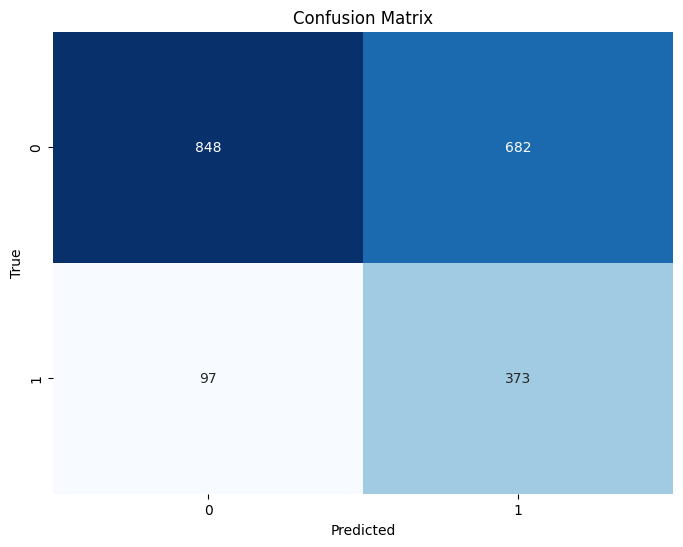

In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Variabel X dan y seperti yang Anda berikan
y = account_df['IsFraud']
X = account_df.drop(['Age','AddressDuration', 'DeviceInformation_Mobile', 'ConsistencyinData_Inconsistent', 'LocationofApplication_Unusual', 'EmploymentVerification_Not Verified'], axis=1)

# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menerapkan SMOTE untuk oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Inisialisasi model SVM
svm_model = SVC(C=1.0, kernel='rbf', random_state=42)

# Melatih model SVM menggunakan data pelatihan yang sudah diresample
svm_model.fit(X_train_resampled, y_train_resampled)

# Lakukan prediksi menggunakan data pengujian
y_pred = svm_model.predict(X_test)

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Membuat matriks konfusi menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
